# EDA dataset Cliengo

Esta notebook ofrece un análisis de la distribución de los datos almacenados en el dataset (*Exploratory Data Analysis*). El objetivo es poder analizar las características fundamentales del texto

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [2]:
df_dataset = pd.read_csv('training_data.csv', index_col=0)
df_dataset.head()

,review,score
0,Era necesario mucho coraje para abordar aconte...,buena
1,Esperaba con curiosidad y ciertas ganas el est...,mala
2,"Wes Craven, convertido en factoría, nos vuelve...",mala
3,Va la gente y se rasga las vestiduras con 'Caó...,mala
4,Director: Mariano Ozores.Duración: 77 minutos....,buena


In [3]:
df_dataset.shape

(812, 2)

**Chequeo de tipos de datos y nulidad**

In [4]:
# Tipos de datos 
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 812 entries, 0 to 811
Data columns (total 2 columns):
review    812 non-null object
score     812 non-null object
dtypes: object(2)
memory usage: 19.0+ KB


In [5]:
# Chequeo de NaN
df_dataset.isna().any()

review    False
score     False
dtype: bool

Como se puede observar, se trata de un dataset con dos columnas: la primera contiene *reviews* y la segunda el *score*, es decir, la ponderación que le dio el usuario. En principio no hay celdas que contengan valores **null** 

## Distribución de los *scores*

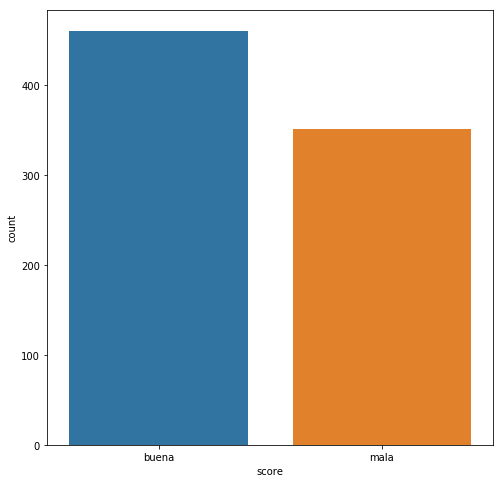

In [6]:
plt.figure(figsize=(8,8))
sns.countplot(x='score', data=df_dataset)

Se observa que la distribución de los *scores* en el dataset es equilibrada. Si bien existen una mayor cantidad de *reviews* con un *score* **buena** respecto de aquellas que tienen *score* **mala**, se puede decir que se trata de un dataset **balanceado**.

## Limpieza del texto

Antes de pasar a anlizar la estructura del texto se realiza una simple limpieza del texto para poder manipularlo con mayor facilidad. Se llevan a cabo las siguientes operaciones:

* Texto a minuscula
* Eliminacion de los signos de puntuacion

In [7]:
df_dataset['review cleaned'] = df_dataset['review'].apply(lambda x: x.lower())
df_dataset.head()

,review,score,review cleaned
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,"wes craven, convertido en factoría, nos vuelve..."
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con 'caó...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director: mariano ozores.duración: 77 minutos....


In [8]:
import string
import re

df_dataset['review cleaned'] = df_dataset['review cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df_dataset.head()

,review,score,review cleaned
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...


## Análisis estadístico preliminar sobre el texto

Se realizan una serie de análisis estadísticos sencillos sobre el texto de las *reviews* para comprender como es la estructura de las *reviews*.

**Longitud de la *reviews***

In [9]:
reviews_length = df_dataset['review cleaned'].str.len()
df_dataset['reviews_length'] = reviews_length
df_dataset.head()

,review,score,review cleaned,reviews_length
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271


In [10]:
reviews_length.describe()

count      812.000000
mean      3007.853448
std       2165.186703
min        588.000000
25%       1742.750000
50%       2482.500000
75%       3573.500000
max      26033.000000
Name: review cleaned, dtype: float64

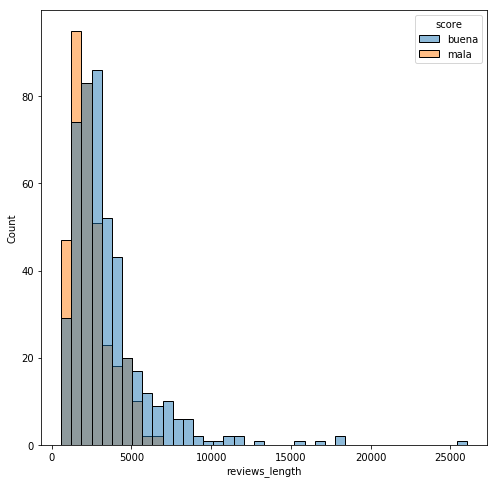

In [11]:
plt.figure(figsize=(8,8))

sns.histplot(data=df_dataset, x='reviews_length', hue='score', bins=40)

En primer lugar, se analizan la longitud de las *reviews*. Se observa que la *review* más corta tiene una longitud de 598, mientras que la más larga tiene una longitud de 26668. El 75% de las reviews tienen una longitud que oscila entre 598 y 3671. Es decir que se tiene una distribución sesgada hacia la izquierda.

También es importante observar que las *reviews* positivas no superan la longitud de 5000.

**Cantidad de palabras por *review***

In [12]:
number_of_words = df_dataset['review cleaned'].str.split().map(lambda x: len(x))
df_dataset['number_of_words'] = number_of_words
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395


In [13]:
number_of_words.describe()

count     812.000000
mean      525.535714
std       374.665724
min        99.000000
25%       308.000000
50%       436.500000
75%       629.000000
max      4584.000000
Name: review cleaned, dtype: float64

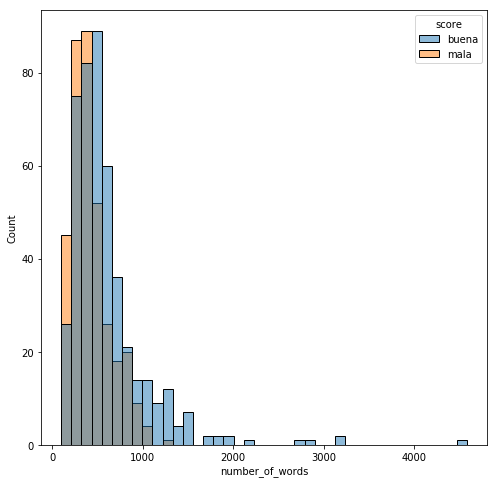

In [14]:
plt.figure(figsize=(8,8))

sns.histplot(data=df_dataset, x='number_of_words', hue='score', bins=40)

Al analizar la cantidad de palabras utilizadas por cada *review* se observa una distribución similar a la anterior, es decir, sesgada a la izquierda. El 75% de las *reviews* tienen una cantidad de palabras que oscilan entre las 99 y las 629. AL igual que en el anterior se observa la tendencia de que las *review* positivas suelen ser más cortas que las *reviews* malas

**Longitud promedio de las palabras por *review***

In [15]:
reviews_avg_length = df_dataset['review cleaned'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))
df_dataset['reviews_avg_length'] = reviews_avg_length
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367


In [16]:
reviews_avg_length.describe()

count    812.000000
mean       4.711309
std        0.217680
min        4.070270
25%        4.578385
50%        4.710407
75%        4.848504
max        5.503185
Name: review cleaned, dtype: float64

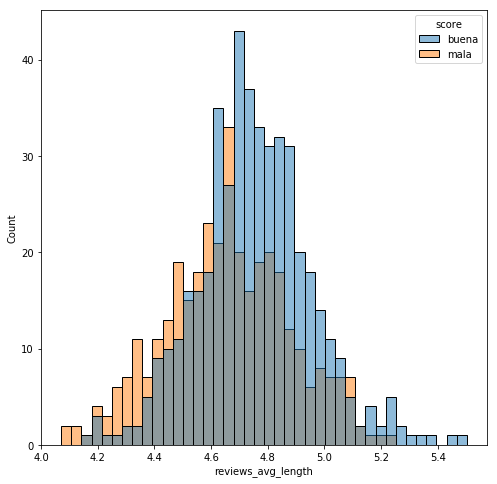

In [17]:
plt.figure(figsize=(8,8))

sns.histplot(data=df_dataset, x='reviews_avg_length', hue='score', bins=40)

Se observa que en promedio la longitud de las palabras es 4.9. Se puede decir las *reviews* suelen construirse con palabras cortas. Claro que esto puede estar influenciado por el uso de **stopwords**. A continuación se analizará su influencia

## Análisis de frecuencia de *stopwords* y palabras más utilizadas

In [18]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop=set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
def create_corpus(reviews):
    reviews_bag_of_words = reviews.str.split()
    reviews_bag_of_words = reviews_bag_of_words.values.tolist()
    corpus= [word for i in reviews_bag_of_words for word in i]
    return corpus
    

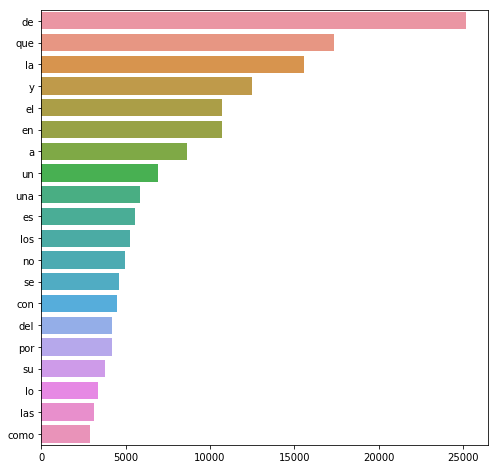

In [20]:
from collections import defaultdict

corpus = create_corpus(df_dataset['review cleaned'])

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:20] 
x,y=zip(*top)

plt.figure(figsize=(8,8))
sns.barplot(x=list(y),y=list(x))

Aquí se puede observar la incidencia de las **stopwords** en las *reviews*. Tal como era de esperar las *reviews* están formadas por gran cantidad de este tipo de palabras. 

A continuación se detallarán las palabras más usadas que no son **stopwords**

In [21]:
from collections import  Counter

def count_palabras_mas_usadas(corpus, stop, top_n=80):
    counter=Counter(corpus)
    most=counter.most_common()
    x, y= [], []
    for word,count in most[:top_n]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    return x, y
    

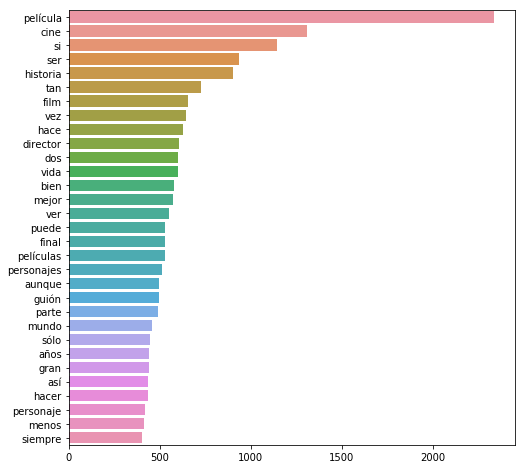

In [51]:
x, y= count_palabras_mas_usadas(corpus, stop, 90)

plt.figure(figsize=(8,8))
sns.barplot(x=y,y=x)

In [23]:
#Defino el corpus de las reviews positivas
df_dataset_buena = df_dataset[df_dataset['score'] == 'buena']
corpus_buena = create_corpus(df_dataset_buena['review cleaned'])

#Defino el corpus de las reviews negativas
df_dataset_mala = df_dataset[df_dataset['score'] == 'mala']
corpus_mala = create_corpus(df_dataset_mala['review cleaned'])

In [26]:
x_buena, y_buena= count_palabras_mas_usadas(corpus_buena, stop, 100)
x_mala, y_mala= count_palabras_mas_usadas(corpus_mala, stop, 100)

Text(0.5,1,'Reviews malas')

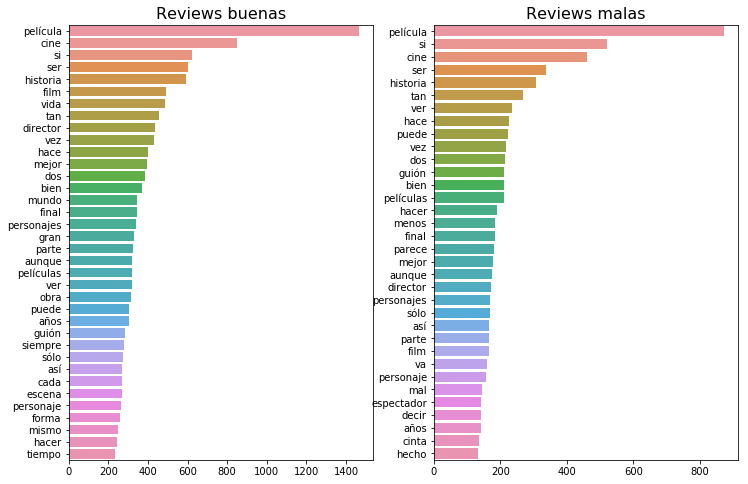

In [27]:
fig, [ax_buena, ax_mala] = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(x=y_buena,y=x_buena, ax=ax_buena).set_title('Reviews buenas', fontsize=16)
sns.barplot(x=y_mala,y=x_mala, ax=ax_mala).set_title('Reviews malas', fontsize=16)

Al observar las frecuencias de las palabras más usadas que no son **stopwords** se puede apreciar el peso que tienen las últimas en la construcción de las *reviews*. Las **stopwords** más frecuentes están en el orden de los 10000 mientra que las otras están en el orden de las 1000.

Al dividir las *reviews* en **buenas** y **malas** y analizar la frecuencia de las palabras más usadas, por un lado se puede observar que hay varias palabras que se repiten en ambos bandos (por ejemplo: película, cine, historia). Por otro lado se pueden empezar a vislumbrar algunas diferencias: en las *reviews* **buenas** suele aparecer las palabras vida, gran, obra; mientras que en las *reviews* **malas** suelen aparecer las palabras guión, menos, parece, así. 

In [29]:
x_comunes = [ x for x in x_buena if x in x_mala]

x_comunes

['película',
 'cine',
 'si',
 'ser',
 'historia',
 'film',
 'tan',
 'director',
 'vez',
 'hace',
 'mejor',
 'dos',
 'bien',
 'final',
 'personajes',
 'parte',
 'aunque',
 'películas',
 'ver',
 'puede',
 'años',
 'guión',
 'sólo',
 'así',
 'personaje',
 'hacer',
 'él']

Es interesante observar que tanto en las *reviews* **buenas** y **malas** hay palabras que se repiten con frecuencia. Estas palabras, no aportan ninguna información para poder entender que es lo que distingue una clase de la otra, por lo tanto son palabras que aportan poca información y se las podría denominar **stopwords del dominio**.

## Análisis de frecuencia de N-grams

Con el fin de comprender mejor el contexto de las *reviews* se analizarán la frecuencia de aparición de la secuencia de tres palabras

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None, top_n=-1):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_n]

In [31]:
#n-grams para review buenas
top_n_bigrams_buena=get_top_ngram(df_dataset_buena['review cleaned'],3,20)
x_buena,y_buena=map(list,zip(*top_n_bigrams_buena))
#n-grams para review malas
top_n_bigrams_mala=get_top_ngram(df_dataset_mala['review cleaned'],3,20)
x_mala,y_mala=map(list,zip(*top_n_bigrams_mala))

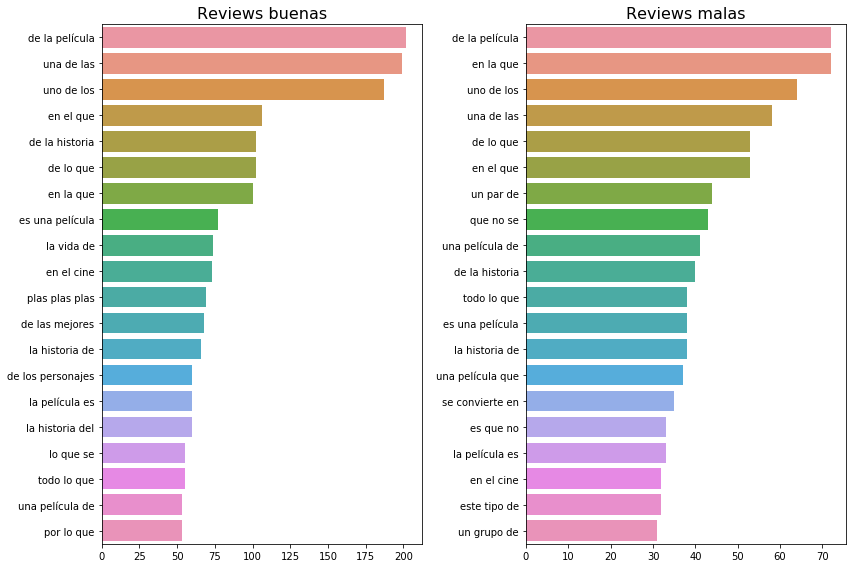

In [32]:
fig, [ax_buena, ax_mala] = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(x=y_buena,y=x_buena, ax=ax_buena).set_title('Reviews buenas', fontsize=16)
sns.barplot(x=y_mala,y=x_mala, ax=ax_mala).set_title('Reviews malas', fontsize=16)
plt.tight_layout()

La frecuencia de **3-grams** permite encontrar más diferencias entre las construcciones de las *reviews* **buenas** y **malas**.

Por el lado de las *review* **buenas** es posible encontrar las estructuras 'la vida de', 'plas plas plas', 'de las mejores', ' lo que sé', que sólo se repiten con gran frecuencia en este tipo de *reviews*.

Mientras que por el lado de las *review* **malas** es posible encontrar las estructuras 'que no se', 'se convierte en', 'un par de', ' es que no', 'este tipo de', que sólo se repiten con gran frecuencia en este tipo de *reviews*.

## Análisis de las reviews a partir de *Document Term Matrix*

A continuación se analizará la frecuencia de las palabras dentro del *corpus* de la palabras que forman todas las *reviews*. Esto permitirá obtener una mejor comprensión de la estructura de los *reviews*.

Para ello se realizarán las siguientes operaciones utilizando la librería **spaCy**:

* Eliminación de las **stopwords del dominio**
* Eliminación de digitos
* Lematización de las palabras

In [34]:
#Eliminación de las stopwords del dominio
df_dataset['review cleaned stopwords']=df_dataset['review cleaned'].apply(lambda x: ' '.join([token for token in x.split(' ') if token not in x_comunes]))
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración 77 minutosestreno 10 de...


In [36]:
import spacy

#Carga del modelo de spaCy
nlp = spacy.load('es_core_news_sm',disable=['parser', 'ner'])


#Eliminación de digitos
df_dataset['review cleaned stopwords']=df_dataset['review cleaned stopwords'].apply(lambda x: re.sub('\w*\d\w*','', x))
# Lemmatizacion y eliminación de stopwords
df_dataset['lemmatized']=df_dataset['review cleaned stopwords'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


In [37]:
df_dataset.head()

,review,score,review cleaned,reviews_length,number_of_words,reviews_avg_length,review cleaned stopwords,lemmatized
0,Era necesario mucho coraje para abordar aconte...,buena,era necesario mucho coraje para abordar aconte...,3812,649,4.873652,era necesario mucho coraje para abordar aconte...,necesario coraje abordar acontecimiento recien...
1,Esperaba con curiosidad y ciertas ganas el est...,mala,esperaba con curiosidad y ciertas ganas el est...,2259,405,4.577778,esperaba con curiosidad y ciertas ganas el est...,esperar curiosidad y gana estreno antonio band...
2,"Wes Craven, convertido en factoría, nos vuelve...",mala,wes craven convertido en factoría nos vuelve a...,1816,317,4.728707,wes craven convertido en factoría nos vuelve a...,wes cravir convertido factoría volver a contar...
3,Va la gente y se rasga las vestiduras con 'Caó...,mala,va la gente y se rasga las vestiduras con caót...,3598,624,4.766026,va la gente y se rasga las vestiduras con caót...,gente y rasgar vestidura caótico án julio mede...
4,Director: Mariano Ozores.Duración: 77 minutos....,buena,director mariano ozoresduración 77 minutosestr...,2271,395,4.749367,mariano ozoresduración minutosestreno de dic...,mariano ozoresduración minutosestreno dici...


Se guarda el dataset preprocesado para poder utilizarlo para el desarrollo de modelos predictivos

In [38]:
df_dataset.to_csv('training_data_preprocessed.csv', index=False)

Con las *reviews* preprocesadas se calcula una matriz llamada ***Document Term Matrix***. Esta matriz contabilizará la cantidad de ocurrencias de una palabra dentro del *corpus* generado por todas las *reviews*. En este caso se utiliza la técnica **TFIDF** para obtener una matriz normalizada

In [39]:
df_grouped=df_dataset[['score','lemmatized']].groupby(by='score').agg(lambda x:' '.join(x))
df_grouped.head()

,lemmatized
score,
buena,necesario coraje abordar acontecimiento recien...
mala,esperar curiosidad y gana estreno antonio band...


In [40]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#cv = CountVectorizer(analyzer='word')
cv = TfidfVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index = df_grouped.index
df_dtm.head(3)

,aa,aar,abadés,abajo,abanderando,abandon,abandonado,abandonar,abandono,abandónelar,...,única,únicamente,únicmanete,único,úrgalo,útero,úterocomo,útil,útimo,útlimo
score,,,,,,,,,,,,,,,,,,,,,
buena,0.000495,0.000704,0.000495,0.005283,0.000495,0.000000,0.002817,0.007748,0.00198,0.000495,...,0.000000,0.01127,0.000495,0.058463,0.000000,0.000000,0.000495,0.001057,0.000495,0.000495
mala,0.000000,0.001271,0.000000,0.003177,0.000000,0.001786,0.001271,0.005718,0.00000,0.000000,...,0.000893,0.00826,0.000000,0.088950,0.000893,0.000893,0.000000,0.001271,0.000000,0.000000


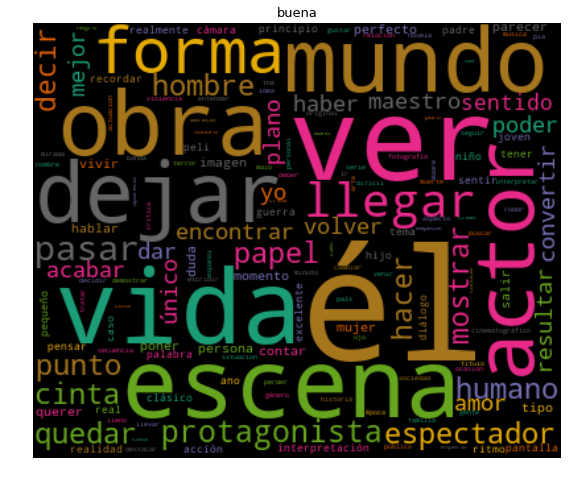

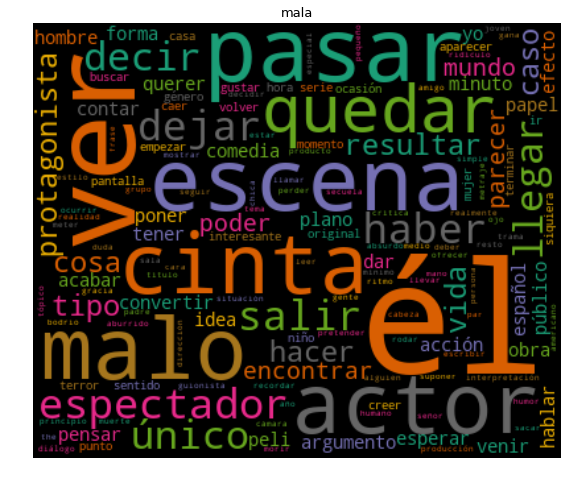

In [41]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
    
    
#Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for index,product in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[product].sort_values(ascending=False),product)

Finalmente, luego de procesar las *reviews* se pueden observar cuáles son las palabras que tienen más peso tanto en las *reviews* **buenas** como de las **malas**. 

Si bien se observan palabras que se repiten, es posible reafirmar algunos indicios mostrados anteriormente:

* En las *reviews* **buenas** suelen preponderar palabras como **vida, obra, mundo, maestro**
* En las *reviews* **malas** suelen preponderar palabras como **malo, cinta, salir, quedar**